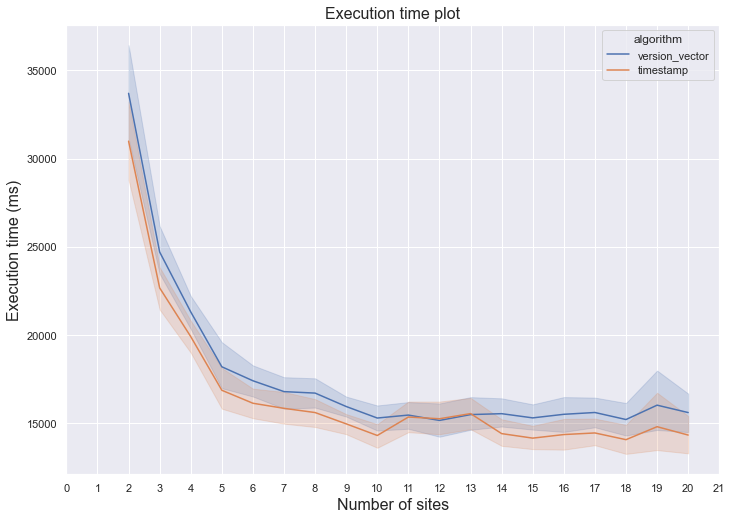

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_vv = pd.read_csv("csv_format/version_vector_formatted.csv")
df_tmsp = pd.read_csv("csv_format/timestamp_formatted.csv")

df_vv['algorithm'] = 'version_vector'
df_tmsp['algorithm'] = 'timestamp'

df = df_vv.append(df_tmsp, ignore_index = True)

df['sites']=df['sites'].astype(int)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_exec_time = sns.lineplot(
    data=df, 
    x="sites",
    y="exec",
    hue="algorithm", 
    err_style="band"
)
plot_exec_time.set_title('Execution time plot', fontsize = 16)
plot_exec_time.set_xlabel("Number of sites", fontsize = 16)
plot_exec_time.set_ylabel("Execution time (ms)", fontsize = 16)
plot_exec_time.set_xticks(range(22))

plt.savefig('execution_times_timestamp_versionvector.png')

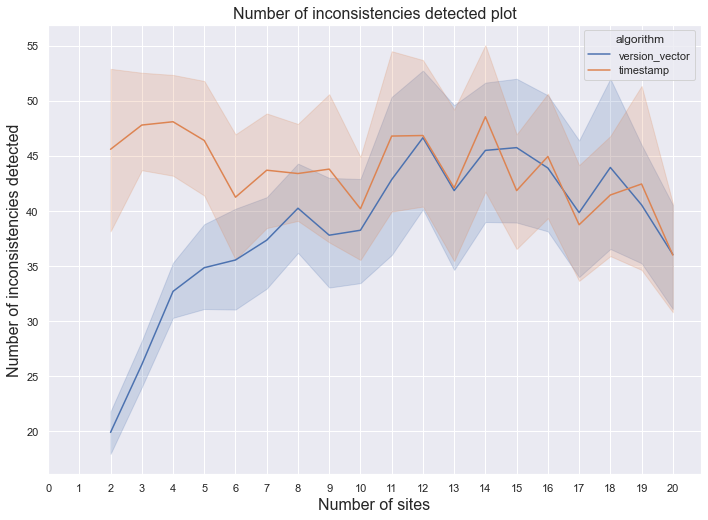

In [20]:
plot_icd_count = sns.lineplot(
    data=df, x="sites", y="icd", hue="algorithm", err_style="band"
)
plot_icd_count.set_title('Number of inconsistencies detected plot', fontsize = 16)
plot_icd_count.set_xlabel("Number of sites", fontsize = 16)
plot_icd_count.set_ylabel("Number of inconsistencies detected", fontsize = 16)
plot_icd_count.set_xticks(range(21))

plt.savefig('icds_timestamp_versionvector.png')

In [21]:
import scipy.stats as stats

vv_icds = df_vv['icd']
tt_icds = df_tmsp['icd']

vv_exec = df_vv['exec']
tt_exec = df_tmsp['exec']

print(vv_icds)
print(tt_icds)
print(vv_exec)
print(tt_exec)

0      24
1      23
2      22
3      12
4      25
       ..
375    24
376    38
377    40
378    31
379    49
Name: icd, Length: 380, dtype: int64
0      40
1      40
2      37
3      18
4      67
       ..
375    22
376    30
377    45
378    25
379    47
Name: icd, Length: 380, dtype: int64
0      33374
1      38929
2      30582
3      26211
4      31521
       ...  
375    12630
376    16769
377    19602
378    12613
379    14787
Name: exec, Length: 380, dtype: int64
0      30604
1      35708
2      28081
3      24101
4      29078
       ...  
375    11573
376    15394
377    18016
378    11574
379    13583
Name: exec, Length: 380, dtype: int64


In [22]:
stats.f_oneway(vv_icds, tt_icds)

F_onewayResult(statistic=26.76912361716569, pvalue=2.9380810221665483e-07)

In [23]:
stats.f_oneway(vv_exec, tt_exec)

F_onewayResult(statistic=9.511370948685682, pvalue=0.002116141519037357)